In [45]:
import os
import glob
import torch
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from pytorch3d.ops import box3d_overlap

ped_predict = np.load("outputs/ped_predict.npy")
ped_predict_max = np.load("outputs/ped_predict.npy")

In [46]:
gtruth_boxes = list()
inference_boxes = list()
iou = list()

for j in range (0, ped_predict.size):
    file = glob.glob("extract/out_corners/0/"+str(j)+"[.]*[_]*[.]*[.]npy")[0]
    folder, element = file.split(".")[-3], file.split(".")[-2]
    
    inference_boxes.append(np.load(file))

    if(not j == (ped_predict.size - 1)):
        files = glob.glob("extract/gtruth_corners/0/*[.]"+folder+"[.]"+element+"[.]npy")

        for file in files:
            gtruth_boxes.append(np.load(file))
        
        if len(gtruth_boxes) == 0:
            for box in inference_boxes:
                iou.append(0)
        
        else: 
            gtruth_boxes = torch.tensor(np.array(gtruth_boxes), dtype=torch.float)
            inference_boxes = torch.tensor(np.array(inference_boxes), dtype=torch.float)

            intersection_vol, iou_3d = box3d_overlap(inference_boxes, gtruth_boxes)

            for tensor in intersection_vol:
                iou.append(torch.sum(tensor).item())

        gtruth_boxes = []
        inference_boxes = []

iou = np.array(iou)

ped_predict_iou = ped_predict[np.where(iou!=0)]
ped_predict_no_iou = ped_predict[np.where(iou==0)]

for i in np.where(iou==0):
    ped_predict_max[i] = 100

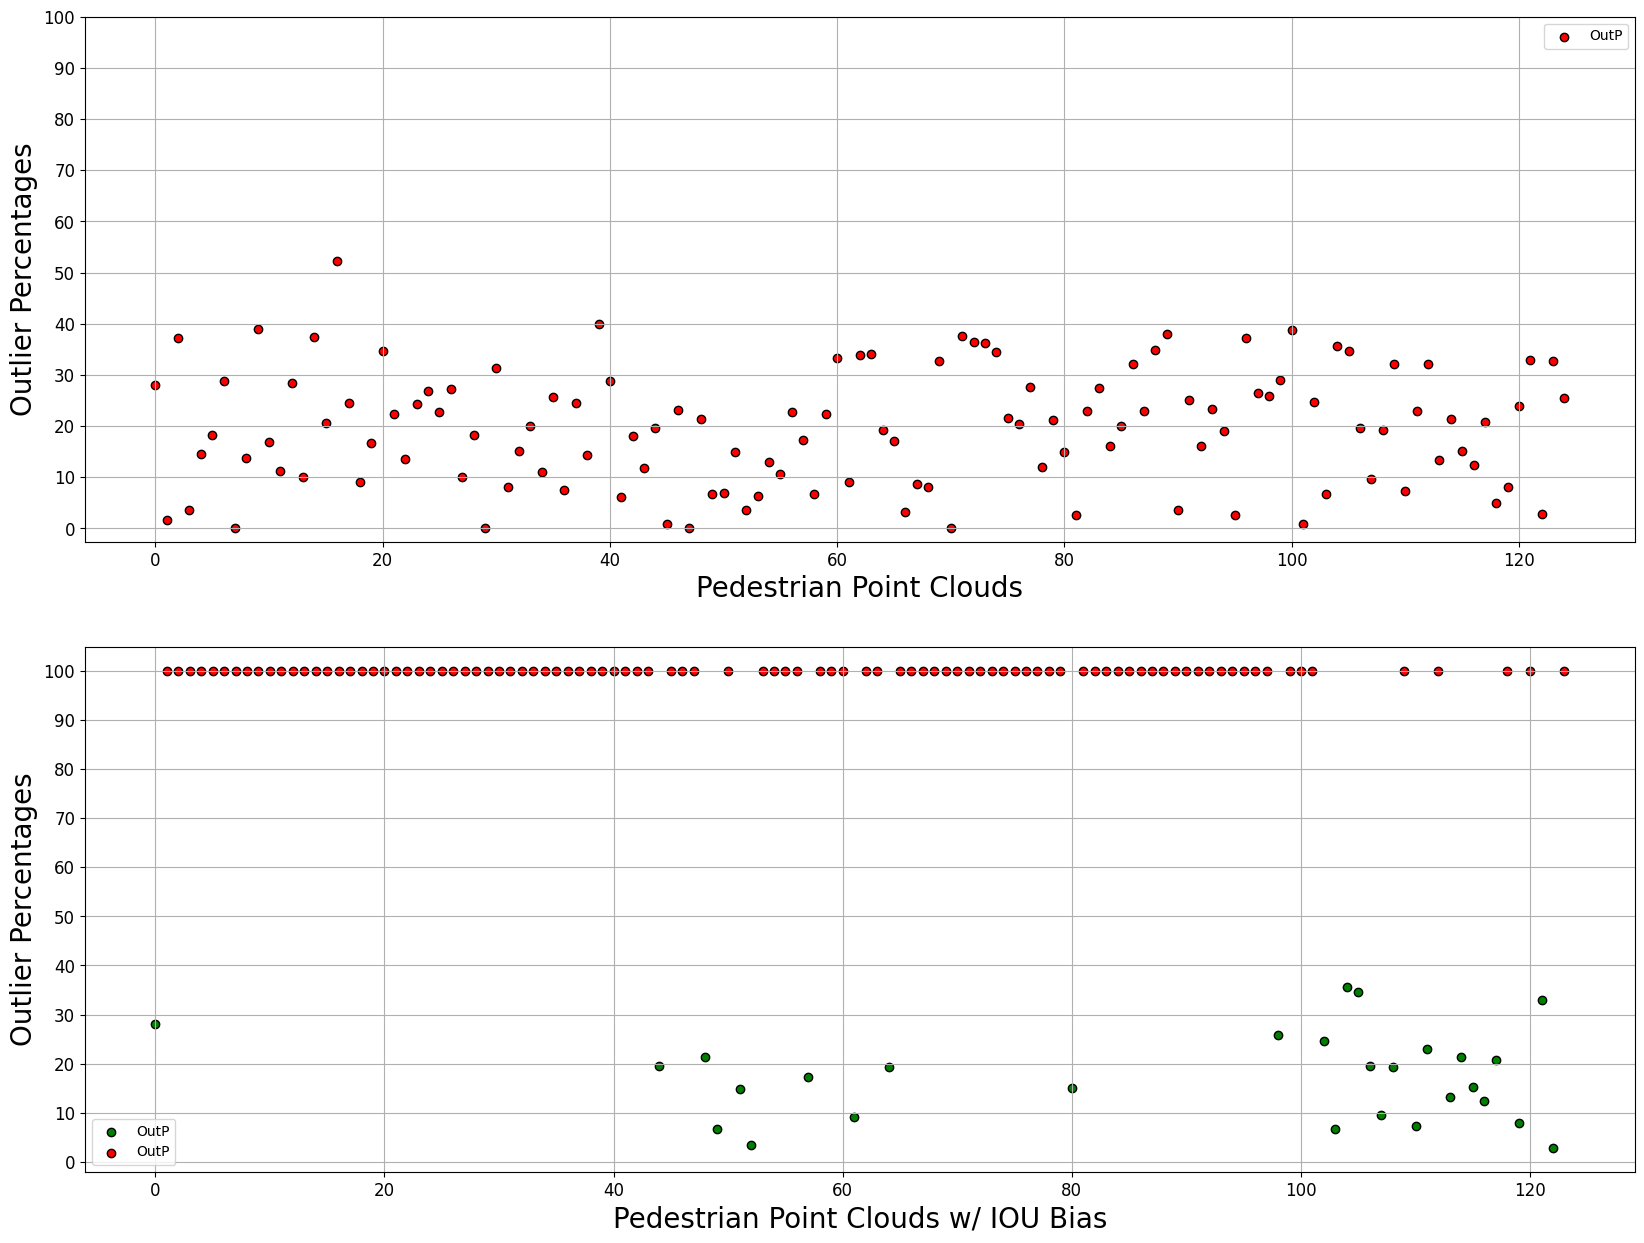

In [47]:
X = np.arange(0, len(ped_predict))

plt.rcParams['figure.figsize'] = [20, 15]

fig, ax = plt.subplots(2)
ax[0].scatter(X, ped_predict, edgecolor='black',color='red', label='OutP')
ax[0].set_yticks(np.arange(0, 110, step=10))
ax[0].tick_params(axis='x', labelsize=12)
ax[0].tick_params(axis='y', labelsize=12)
ax[0].legend()
ax[0].grid()
ax[0].set_ylabel('Outlier Percentages', fontsize=20)
ax[0].set_xlabel('Pedestrian Point Clouds', fontsize=20)

########################

ax[1].scatter(X[np.where(iou!=0)], ped_predict_max[np.where(iou!=0)], edgecolor='black',color='green', label='OutP')
ax[1].scatter(X[np.where(iou==0)], ped_predict_max[np.where(iou==0)], edgecolor='black',color='red', label='OutP')
ax[1].set_yticks(np.arange(0, 110, step=10))
ax[1].tick_params(axis='x', labelsize=12)
ax[1].tick_params(axis='y', labelsize=12)
ax[1].legend()
ax[1].grid()
ax[1].set_ylabel('Outlier Percentages', fontsize=20)
ax[1].set_xlabel('Pedestrian Point Clouds w/ IOU Bias', fontsize=20)
plt.show()

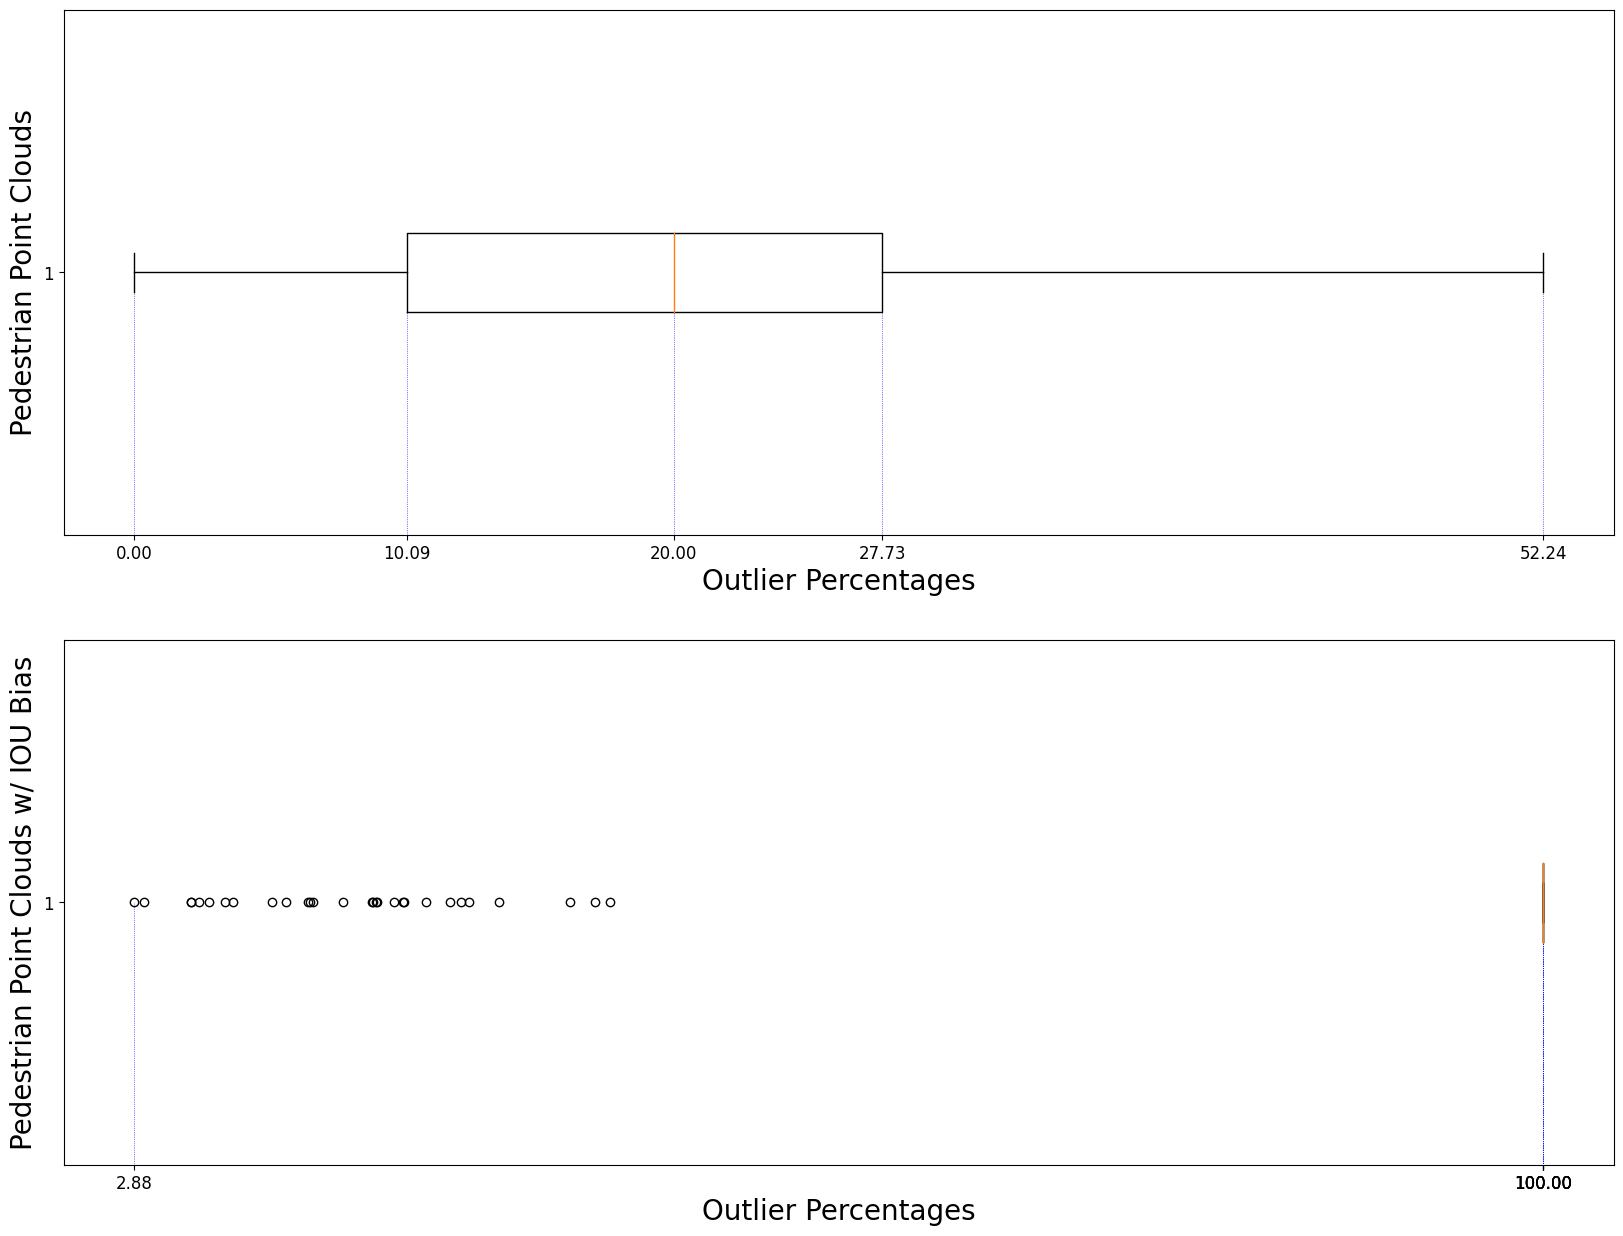

In [48]:
fig, ax = plt.subplots(2, figsize=(20, 15))
##1
ax[0].boxplot(ped_predict, vert=False, manage_ticks=True)
ax[0].set_xlabel('Outlier Percentages', fontsize=20)
ax[0].set_yticks([1])
ax[0].set_ylabel('Pedestrian Point Clouds', fontsize=20)

quantiles = np.percentile(ped_predict, np.arange(0, 110, step=25))
ax[0].vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size,
          color='b', ls=':', lw=0.5, zorder=0)
ax[0].set_ylim(0.5, 1.5)
ax[0].set_xticks(quantiles)
ax[0].tick_params(axis='x', labelsize=12)
ax[0].tick_params(axis='y', labelsize=12)

####################

##2
ax[1].boxplot(ped_predict_max, vert=False, manage_ticks=True)
ax[1].set_xlabel('Outlier Percentages', fontsize=20)
ax[1].set_yticks([1])
ax[1].set_ylabel('Pedestrian Point Clouds w/ IOU Bias', fontsize=20)

quantiles = np.percentile(ped_predict_max, np.arange(0, 110, step=25))
ax[1].vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size,
          color='b', ls=':', lw=0.5, zorder=0)
ax[1].set_ylim(0.5, 1.5)
ax[1].set_xticks(quantiles)
ax[1].tick_params(axis='x', labelsize=12)
ax[1].tick_params(axis='y', labelsize=12)

plt.show()

In [49]:
print("Outliers:")
print("Sample Size:" + str(len(ped_predict)))
print("Percentiles:" + str(np.percentile(ped_predict, np.arange(0, 110, step=10))))
print("Standard Deviation:" + str(np.std(ped_predict)))
print("Variance:" + str(np.var(ped_predict)))
print("\n")
print("Outliers w/ IOU Bias:")
print("Sample Size:" + str(len(ped_predict_max)))
print("Percentiles:" + str(np.percentile(ped_predict_max, np.arange(0, 110, step=10))))
print("Standard Deviation:" + str(np.std(ped_predict_max)))
print("Variance:" + str(np.var(ped_predict_max)))
print("Miss%:" + str((ped_predict_max[np.where(iou==0)].size/ped_predict_max.size)*100))

Outliers:
Sample Size:125
Percentiles:[ 0.          3.64523282  8.09142476 12.46572497 16.45962733 20.
 22.84083703 25.54203936 31.50829563 34.73504274 52.23880597]
Standard Deviation:11.345846377144072
Variance:128.72823001375326


Outliers w/ IOU Bias:
Sample Size:125
Percentiles:[  2.87713841  16.02698651  27.60556735 100.         100.
 100.         100.         100.         100.         100.
 100.        ]
Standard Deviation:34.996736462910036
Variance:1224.7715630543767
Miss%:76.8


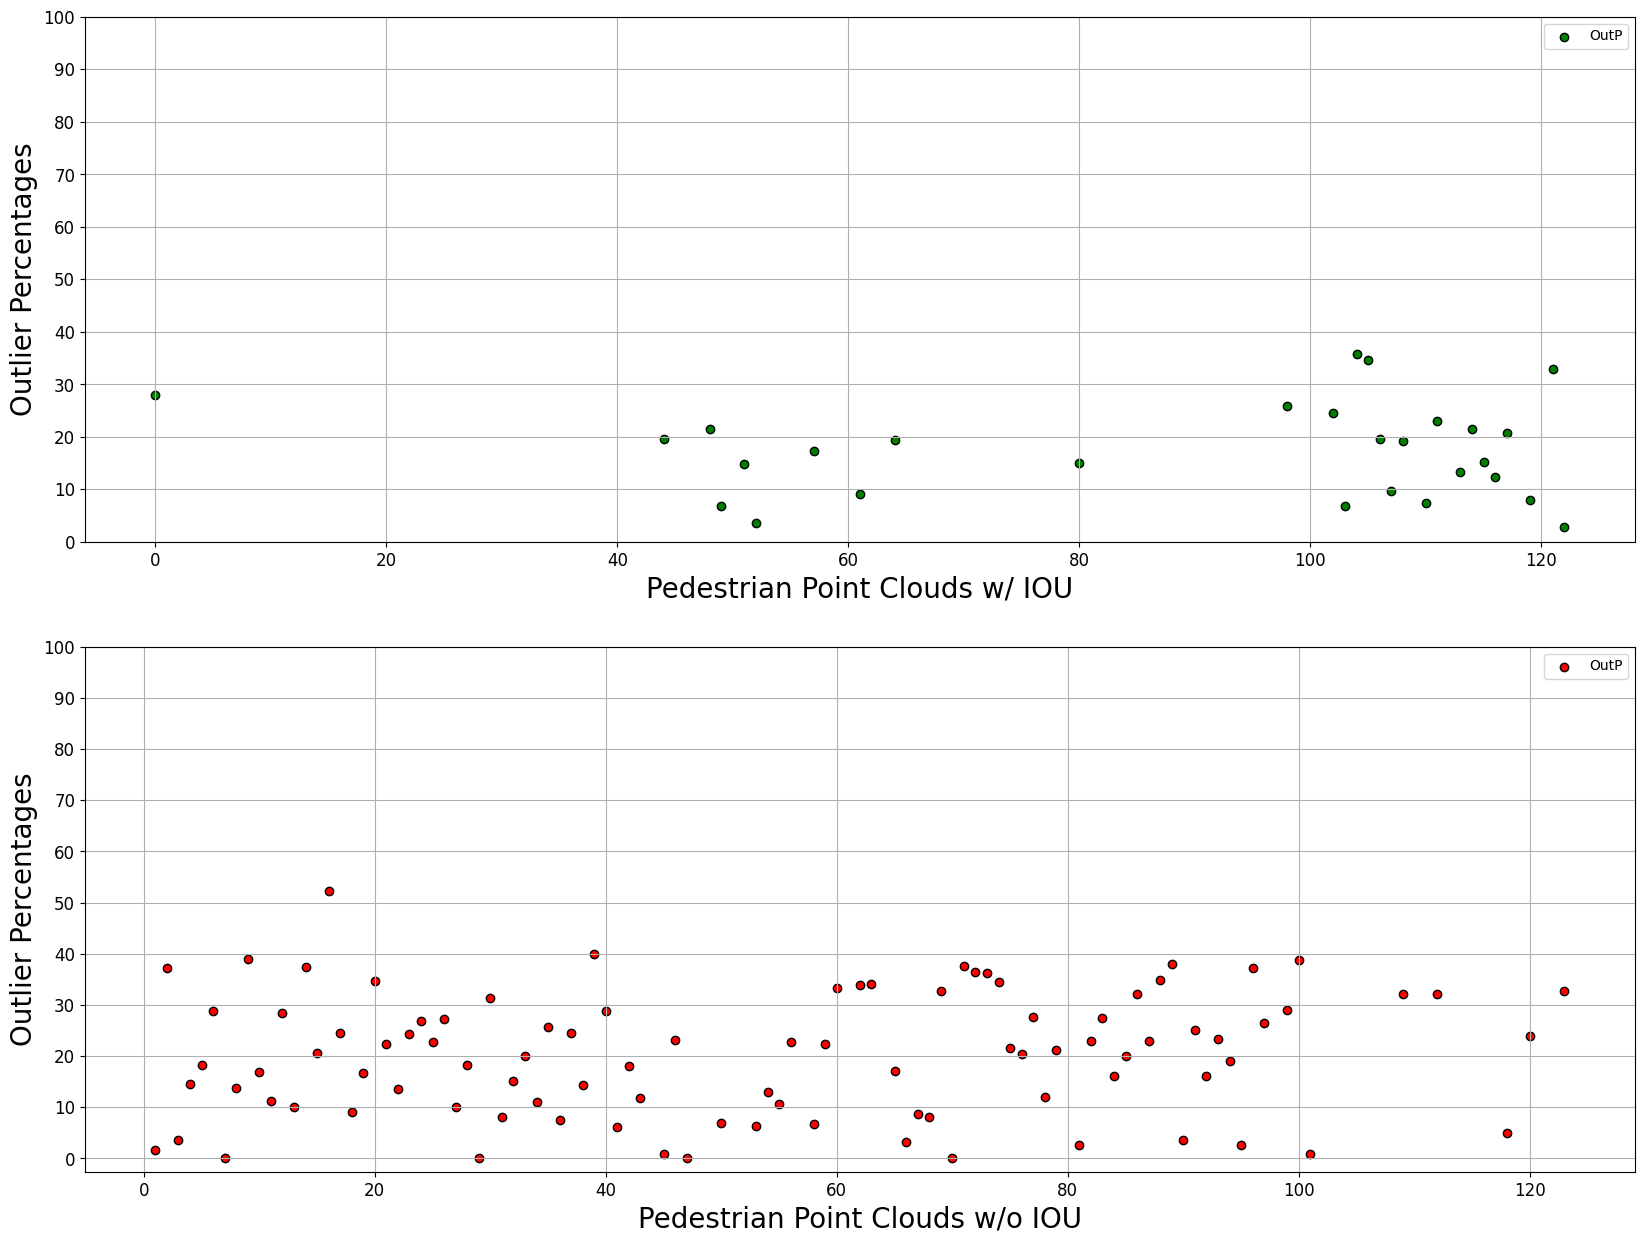

In [50]:
X = np.arange(0, len(ped_predict))

plt.rcParams['figure.figsize'] = [20, 15]

fig, ax = plt.subplots(2)
ax[0].scatter(X[np.where(iou!=0)], ped_predict_iou, edgecolor='black',color='green', label='OutP')
ax[0].set_yticks(np.arange(0, 110, step=10))
ax[0].tick_params(axis='x', labelsize=12)
ax[0].tick_params(axis='y', labelsize=12)
ax[0].legend()
ax[0].grid()
ax[0].set_ylabel('Outlier Percentages', fontsize=20)
ax[0].set_xlabel('Pedestrian Point Clouds w/ IOU', fontsize=20)

########################

ax[1].scatter(X[np.where(iou==0)], ped_predict_no_iou, edgecolor='black',color='red', label='OutP')
ax[1].set_yticks(np.arange(0, 110, step=10))
ax[1].tick_params(axis='x', labelsize=12)
ax[1].tick_params(axis='y', labelsize=12)
ax[1].legend()
ax[1].grid()
ax[1].set_ylabel('Outlier Percentages', fontsize=20)
ax[1].set_xlabel('Pedestrian Point Clouds w/o IOU', fontsize=20)
plt.show()

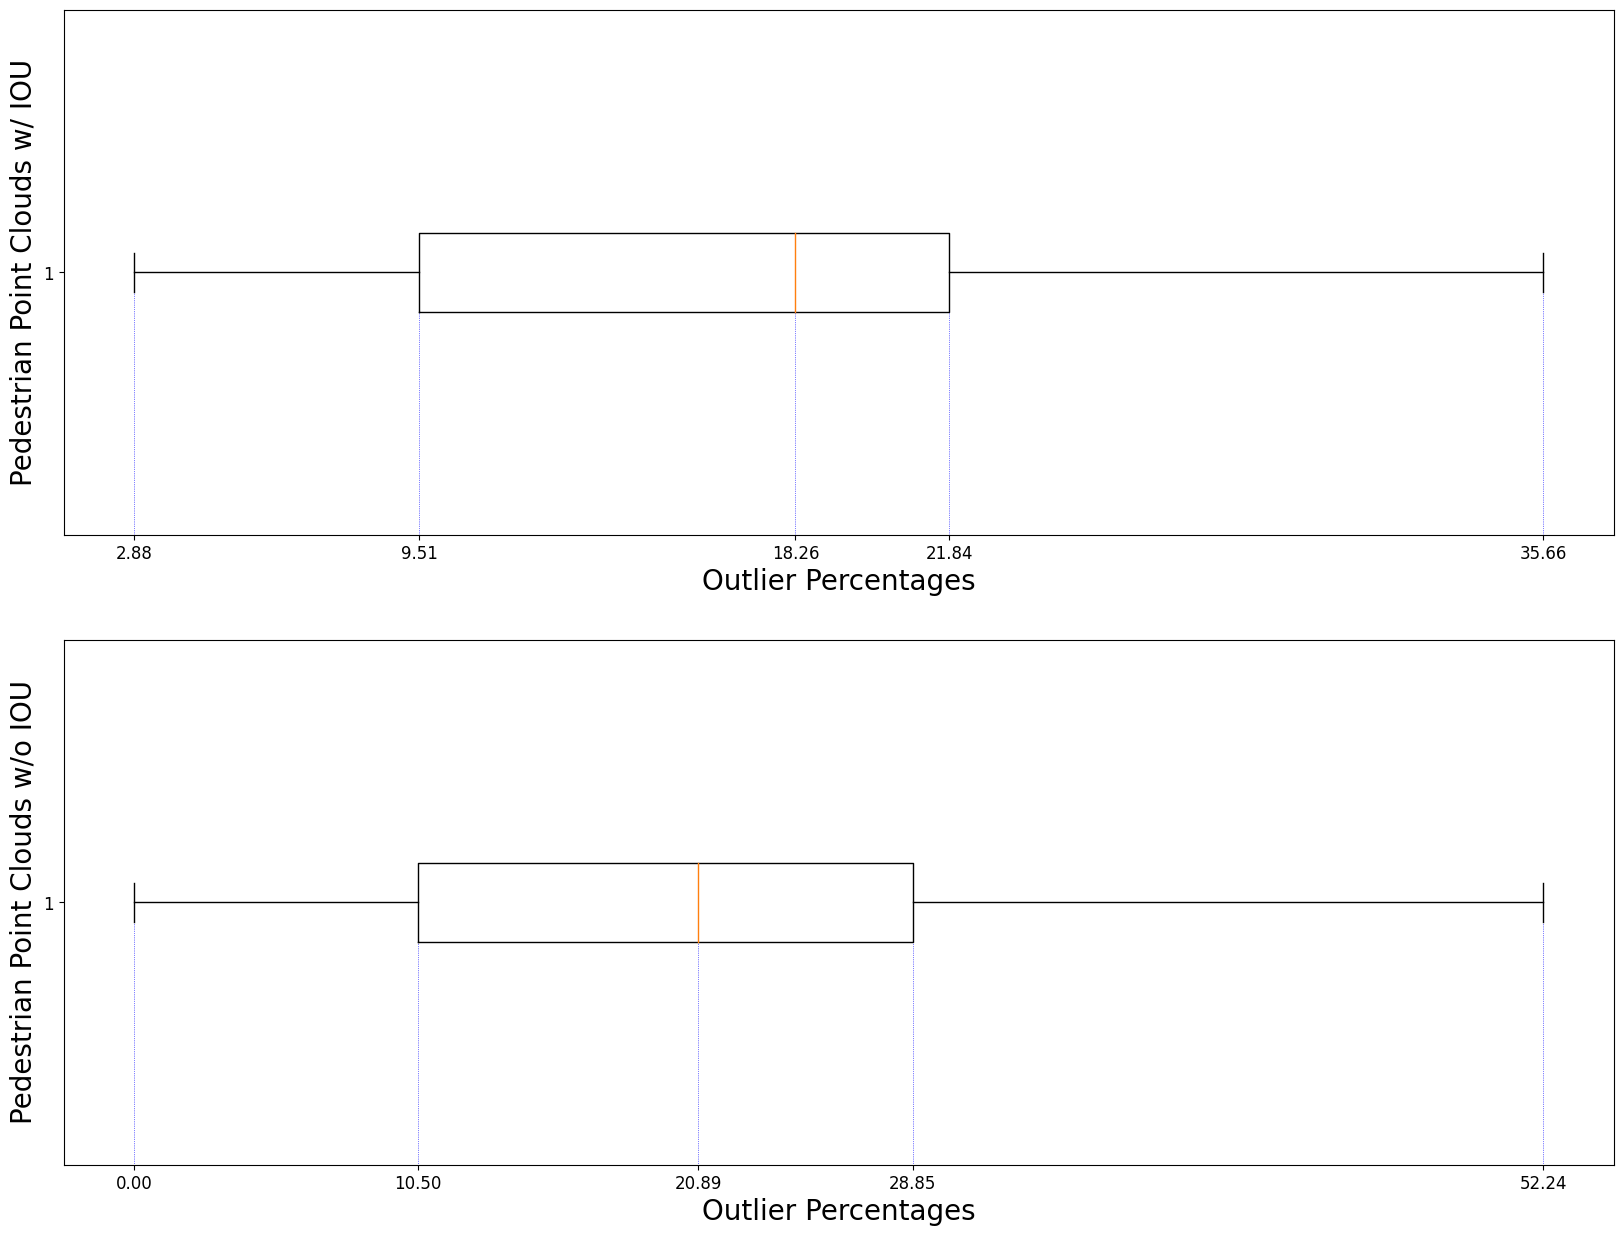

In [51]:
fig, ax = plt.subplots(2, figsize=(20, 15))
##1
ax[0].boxplot(ped_predict_iou, vert=False, manage_ticks=True)
ax[0].set_xlabel('Outlier Percentages', fontsize=20)
ax[0].set_yticks([1])
ax[0].set_ylabel('Pedestrian Point Clouds w/ IOU', fontsize=20)

quantiles = np.percentile(ped_predict_iou, np.arange(0, 110, step=25))
ax[0].vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size,
          color='b', ls=':', lw=0.5, zorder=0)
ax[0].set_ylim(0.5, 1.5)
ax[0].set_xticks(quantiles)
ax[0].tick_params(axis='x', labelsize=12)
ax[0].tick_params(axis='y', labelsize=12)

####################

##2
ax[1].boxplot(ped_predict_no_iou, vert=False, manage_ticks=True)
ax[1].set_xlabel('Outlier Percentages', fontsize=20)
ax[1].set_yticks([1])
ax[1].set_ylabel('Pedestrian Point Clouds w/o IOU', fontsize=20)

quantiles = np.percentile(ped_predict_no_iou, np.arange(0, 110, step=25))
ax[1].vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size,
          color='b', ls=':', lw=0.5, zorder=0)
ax[1].set_ylim(0.5, 1.5)
ax[1].set_xticks(quantiles)
ax[1].tick_params(axis='x', labelsize=12)
ax[1].tick_params(axis='y', labelsize=12)

plt.show()

In [52]:
print("IOU:")
print("Sample Size:" + str(len(ped_predict_iou)))
print("Percentiles:" + str(np.percentile(ped_predict_iou, np.arange(0, 110, step=10))))
print("Standard Deviation:" + str(np.std(ped_predict_iou)))
print("Variance:" + str(np.var(ped_predict_iou)))
print("\n")
print("No IOU:")
print("Sample Size:" + str(len(ped_predict_no_iou)))
print("Percentiles:" + str(np.percentile(ped_predict_no_iou, np.arange(0, 110, step=10))))
print("Standard Deviation:" + str(np.std(ped_predict_no_iou)))
print("Variance:" + str(np.var(ped_predict_no_iou)))

IOU:
Sample Size:28
Percentiles:[ 2.87713841  6.78861529  8.43636364 12.44669467 14.96703297 18.25924387
 19.56969969 21.31889275 23.95202456 29.49361079 35.66433566]
Standard Deviation:8.874671869326065
Variance:78.75980078820739


No IOU:
Sample Size:96
Percentiles:[ 0.          3.38068182  8.10810811 12.46551724 16.85393258 20.89344163
 23.33333333 27.29341737 32.17821782 36.26692456 52.23880597]
Standard Deviation:11.938718755860048
Variance:142.5330055315245


In [53]:
# Calculate highest anomaly.

temp = np.absolute(ped_predict_max-10)
index = temp.argmin()

file = glob.glob("extract/out_corners/0/"+str(index)+"[.]*[_]*[.]*[.]npy")[0]
folder, element = file.split(".")[-3], file.split(".")[-2]

print("Nearest score to the given value is: ", ped_predict_max[index])
print("Index of nearest value is : ", index)
print("Folder: ", folder)
print("Element:", element)

Nearest score to the given value is:  9.644670050761421
Index of nearest value is :  107
Folder:  20220830_164124
Element: 1661872273872442000
